# Machine Learning: Detección de Fraude en Tarjetas de Crédito
Este proyecto analiza un dataset de transacciones bancarias para detectar fraudes utilizando modelos de aprendizaje automático.

### **Análisis y evaluación del Dataset**
<hr>

#### 1. Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

#### 2. Cargar y analizar el dataset

In [2]:
# Cargar los datos
df = pd.read_csv('creditcard.csv')
df.dropna(inplace=True)
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 3. Análisis de las clases

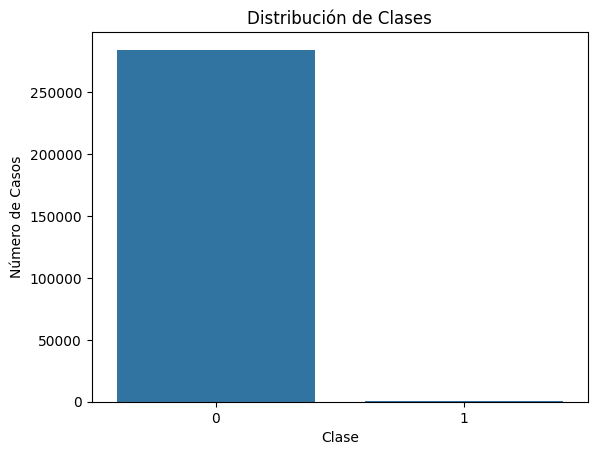

In [3]:
fraud_cases = df['Class'].value_counts()
sns.barplot(x=fraud_cases.index, y=fraud_cases.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Número de Casos')
plt.show()

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Dataset desbalanceado:**
* Clase 0 (No Fraude): 284315 transacciones
* Clase 1 (Fraude): 492 transacciones


#### 4. Preprocesamiento de Datos

In [6]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], train_size=0.7, random_state=42)
# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Modelo de Regresión Logística

In [7]:
# Entrenar modelo base
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
# Evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9992626663389628
Recall: 0.625
Precision: 0.8762886597938144
F1-score: 0.7296137339055794


#### 6. Matriz de Confusión

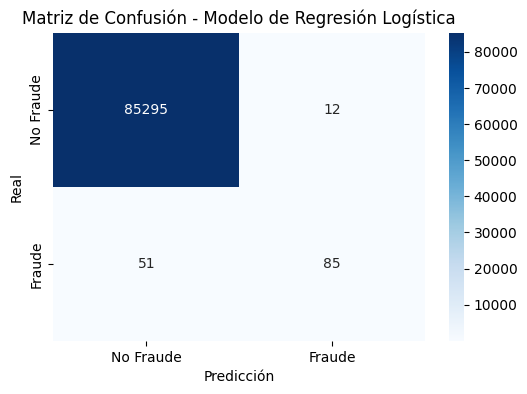

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Modelo de Regresión Logística")
plt.show()

* 85295 TN (True Negatives) → **85295 transacciones normales detectadas** correctamente.
* 12 FP (False Positives) → **12 transacciones normales** clasificadas como fraude.
* 51 FN (False Negatives) → **51 fraudes no detectados** (el modelo falló en ellos).
* 85 TP (True Positives) → **85 fraudes detectados** correctamente.

#### **Evaluación de las métricas**
* **Specificity (Especificidad) = 0.99986 (~99.99%)**: Detecta perfectamente los casos normales.
* **F1-score = 0.729 (~72.96%)**: Un balance entre precisión y recall, el valor no es malo, pero tampoco ideal.
* **Accuracy (Exactitud) = 0.99926 (~99.93%)** Métrica engañosa porque el dataset está desbalanceado, la **alta exactitud no significa que detecte bien los fraudes**.
* **Recall (Sensibilidad) = 0.625 (~62.5%):** De cada 100 fraudes reales, detecta 62 y deja escapar 38.**Queremos maximizar el Recall.**
* **Precision (Precisión) = 0.876 (~87.6%)** : Cuando el modelo predice "Fraude", acierta el 87.6% de las veces.

### **Métodos de Detección de Anomalías**
<hr>

#### 1. Determinante de Covarianza Mínima

In [11]:
# 🔵 Determinante de Covarianza Mínima
best_mcd = EllipticEnvelope(contamination=0.01, random_state=42)
best_mcd.fit(X_train_scaled)

y_pred_best = best_mcd.predict(X_train_scaled)
mask_best = y_pred_best != -1  # Filtrar datos sin outliers
X_train_best, y_train_best = X_train_scaled[mask_best], y_train[mask_best]

# Entrenar el mejor modelo de Regresión Logística
best_model_mcd = LogisticRegression()
best_model_mcd.fit(X_train_best, y_train_best)

# Predecir en el conjunto de prueba
y_pred_best_mcd = best_model_mcd.predict(X_test_scaled)

c:\Users\mcaro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-280.100958610474379 > -281.952632851244630). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\mcaro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-275.718603781281502 > -277.692412542047123). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\mcaro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-279.043570470596194 > -279.660104679804761). You may want to

In [ ]:
#@title 5. Matriz de confusión del mejor modelo
best_conf_matrix = confusion_matrix(y_test, y_pred_best_mcd)
best_conf_matrix

In [ ]:
#@title 6.Métricas de Evaluación
print("Accuracy: ", accuracy_score(y_test, y_pred_best_mcd))
print("Recall: ", recall_score(y_test, y_pred_best_mcd))
print("precision_score: ", precision_score(y_test, y_pred_best_mcd))
print("Especificidad: ", recall_score(y_test, y_pred_best_mcd, pos_label=0)) # Negativos predichos correctamente
print("F1-score: ", f1_score(y_test, y_pred_best_mcd))

## 📈 7. Visualización de Matrices de Confusión y Curvas ROC/AUC

In [ ]:
plt.figure(figsize=(12, 5))
for i, (name, y_preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
plt.show()